In [70]:
import numpy as np
import itertools
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import netCDF4
import matplotlib.image as imag
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA,IncrementalPCA
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
from statistics import mode
from scipy.ndimage.filters import uniform_filter1d
from sklearn.utils import shuffle
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [71]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-1.0, vmax = 1.0)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [72]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [73]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
lons = np.array(others.variables['lon'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [74]:
amazon_z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/Full_3_Months_Amazon_2D_PCA_Latent_Space__31.npy")
ocean_z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/Full_3_Months_Atlantic_2D_PCA_Latent_Space__31.npy")

Amazon_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/test_amazon_all.npy")
Ocean_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/test_atlantic_all.npy")

Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")

Amazon_Test_Images = np.interp(Amazon_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
Ocean_Test_Images = np.interp(Ocean_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

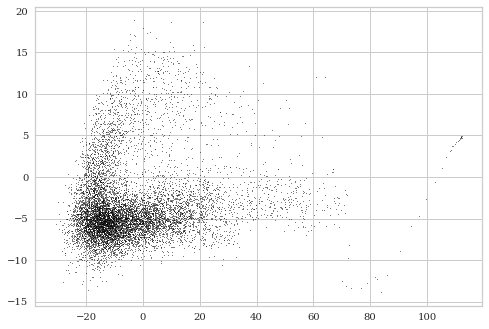

In [75]:
plt.scatter(x=amazon_z_test_tsne[:, 0], y=amazon_z_test_tsne[:, 1], c="black", s=0.2)

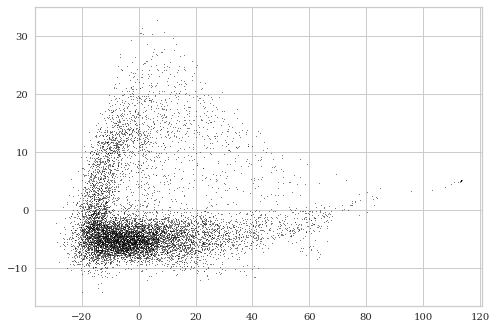

In [76]:
plt.scatter(x=ocean_z_test_tsne[:, 0], y=ocean_z_test_tsne[:, 1], c="black", s=0.2)

In [77]:
ocean_labels = np.empty(shape=(len(ocean_z_test_tsne)))
amazon_labels = np.empty(shape=(len(amazon_z_test_tsne)))

In [78]:
count = 0
for i in range(24):
    for j in range(4):
        ocean_labels[count::96] = i
        amazon_labels[count::96] = i
        count = count+1

In [79]:
print(ocean_labels.shape)
print(amazon_labels.shape)

(9788,)
(9777,)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
 


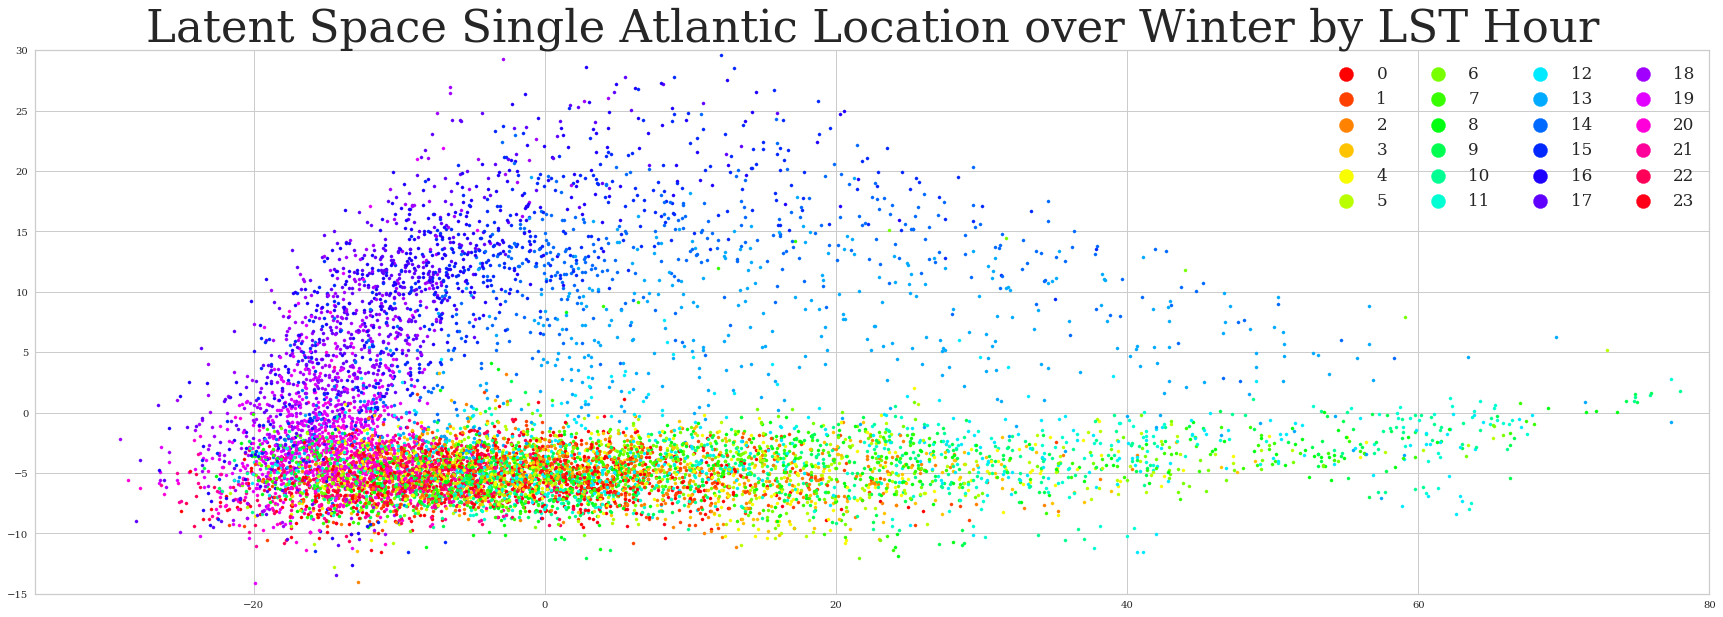

In [86]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-35, 80)
ax.set_ylim(-15,30)
obs = []
for i in range(len(ocean_z_test_tsne)):
    if i %1000 == 0:
        print(i)
    if int(ocean_labels[i]) not in obs:
        obs.append(int(ocean_labels[i]))
        ax.scatter(x=ocean_z_test_tsne[i, 0], y=ocean_z_test_tsne[i, 1], c=colors[int(ocean_labels[i])], s=10.0, label = str(int(ocean_labels[i])))
    else:
        ax.scatter(x=ocean_z_test_tsne[i, 0], y=ocean_z_test_tsne[i, 1], c=colors[int(ocean_labels[i])], s=10.0)
        

lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Atlantic Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
 


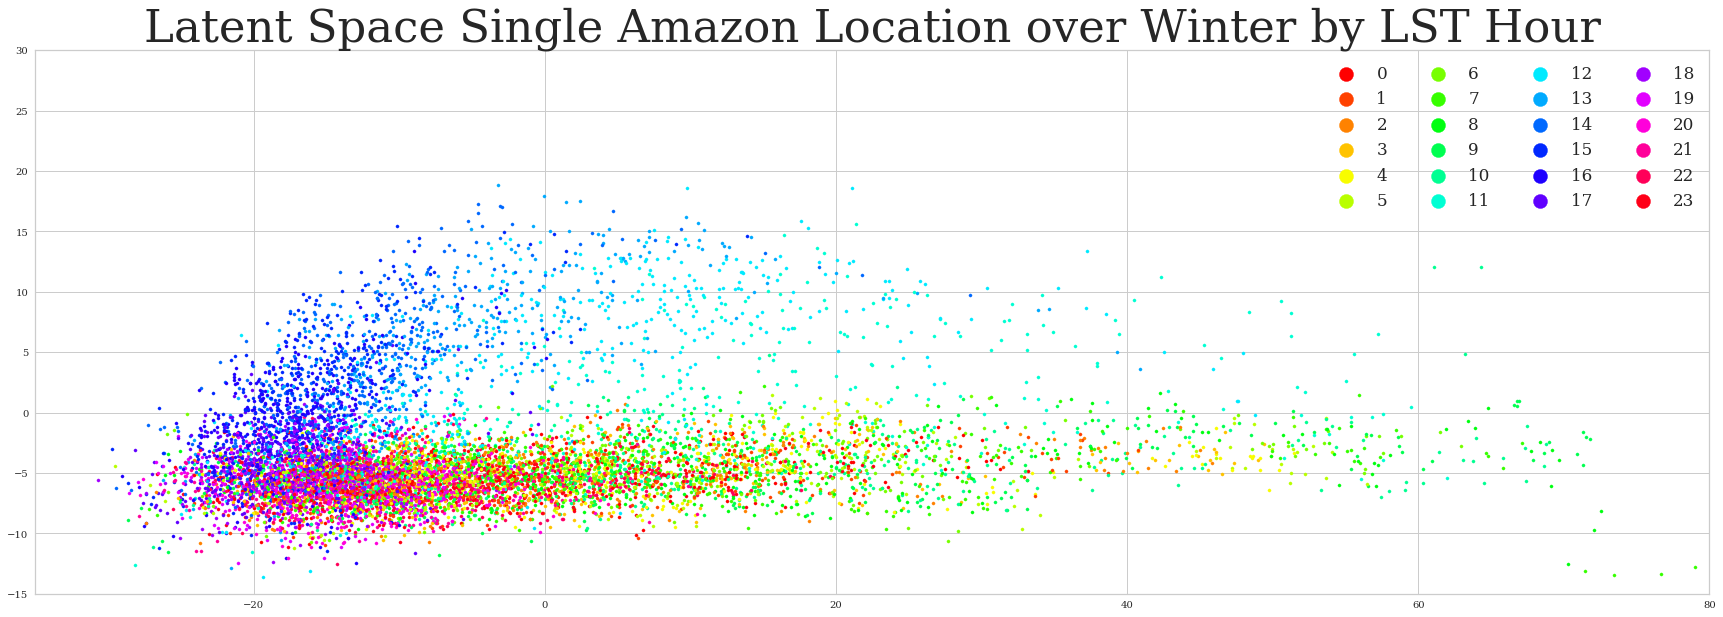

In [87]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-35, 80)
ax.set_ylim(-15,30)
obs = []
for i in range(len(amazon_z_test_tsne)):
    if i %1000 == 0:
        print(i)
    if int(amazon_labels[i]) not in obs:
        obs.append(int(amazon_labels[i]))
        ax.scatter(x=amazon_z_test_tsne[i, 0], y=amazon_z_test_tsne[i, 1], c=colors[int(amazon_labels[i])], s=10.0, label = str(int(amazon_labels[i])))
    else:
        ax.scatter(x=amazon_z_test_tsne[i, 0], y=amazon_z_test_tsne[i, 1], c=colors[int(amazon_labels[i])], s=10.0)
        

lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Amazon Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
 


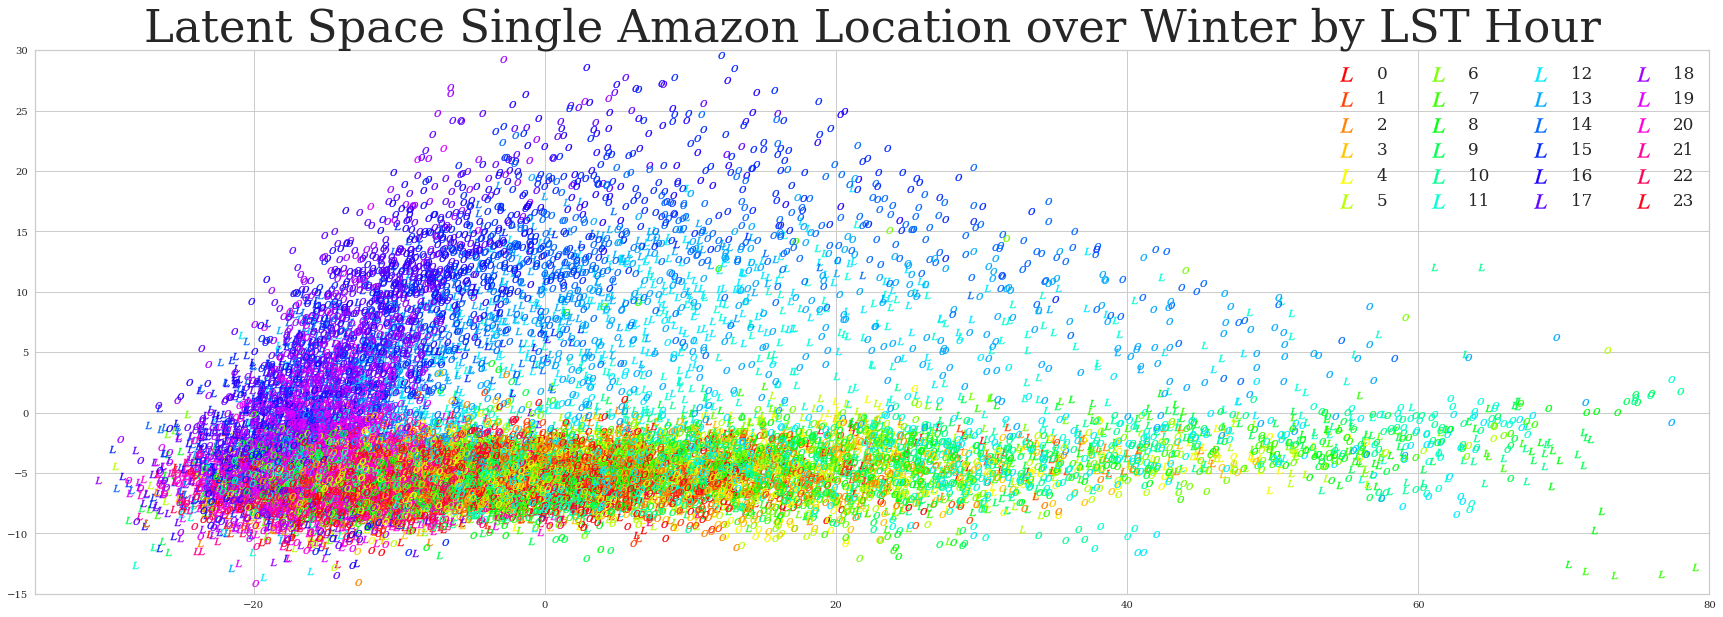

In [88]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-35, 80)
ax.set_ylim(-15,30)
obs = []
for i in range(len(amazon_z_test_tsne)):
    if i %1000 == 0:
        print(i)
    if int(amazon_labels[i]) not in obs:
        obs.append(int(amazon_labels[i]))
        ax.scatter(x=amazon_z_test_tsne[i, 0], y=amazon_z_test_tsne[i, 1], c=colors[int(amazon_labels[i])], s=50.0, label = str(int(amazon_labels[i])), marker = '$L$')
    else:
        ax.scatter(x=amazon_z_test_tsne[i, 0], y=amazon_z_test_tsne[i, 1], c=colors[int(amazon_labels[i])], s=50.0, marker = '$L$')
        

for i in range(len(ocean_z_test_tsne)):
        ax.scatter(x=ocean_z_test_tsne[i, 0], y=ocean_z_test_tsne[i, 1], c=colors[int(ocean_labels[i])], s=50.0, marker = '$O$')
                  
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Amazon Location over Winter by LST Hour", fontsize=fz*2)
print(" ")